# Community Analysis

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import itertools

import matplotlib.pyplot as plt

# 1. Florentine Families

ref. [S-Analysis, Networkxのグラフのクラスタリング(コミュニティ)](https://data-analysis-stats.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92/networkx%E3%81%AE%E3%82%B0%E3%83%A9%E3%83%95%E3%81%AE%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0%E3%82%B3%E3%83%9F%E3%83%A5%E3%83%8B%E3%83%86%E3%82%A3/)

Graph with 15 nodes and 20 edges
Number of communities: 4
Communities: (
  {'Acciaiuoli', 'Tornabuoni', 'Medici', 'Ridolfi'}, 
  {'Peruzzi', 'Barbadori', 'Bischeri', 'Strozzi', 'Castellani'}, 
  {'Lamberteschi', 'Ginori', 'Albizzi', 'Guadagni'}, 
  {'Salviati', 'Pazzi'})


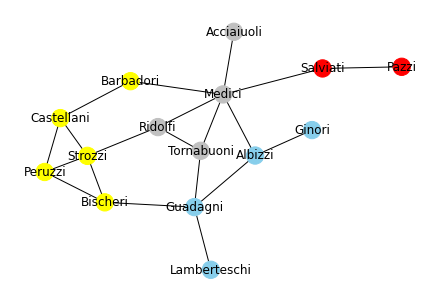

In [2]:
G = nx.florentine_families_graph()
print(nx.info(G))

community_list = list(nx.algorithms.community.girvan_newman(G))[2]
print('Number of communities: {}\nCommunities: {}'.format(len(community_list), community_list).replace('{', '\n  {'))

color_map = []
for node in G:
    if node in community_list[0]:
        color_map.append('silver')
    elif node in community_list[1]:
        color_map.append('yellow')
    elif node in community_list[2]:
        color_map.append('skyblue')
    else:
        color_map.append('red')

nx.draw(G, node_color=color_map, with_labels=True)

# 2. Scale Free Network

Graph with 50 nodes and 96 edges
5 {0, 33, 45, 14, 18}
6 {1, 2, 36, 11, 46, 24}
5 {3, 12, 19, 25, 28}
12 {32, 4, 5, 6, 7, 40, 10, 13, 16, 17, 27, 31}
10 {34, 38, 8, 9, 15, 47, 23, 26, 29, 30}
8 {35, 39, 41, 42, 43, 48, 20, 21}
4 {49, 44, 37, 22}


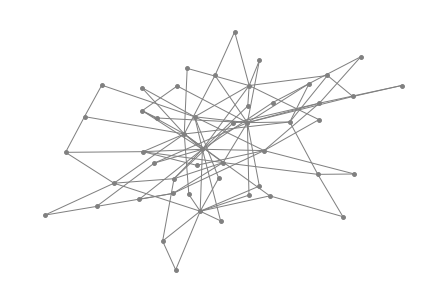

In [3]:
G = nx.barabasi_albert_graph(50, 2)
print(nx.info(G))
nx.draw(G, node_color='gray', edge_color='gray', node_size=15)

community_list_list = list(nx.algorithms.community.girvan_newman(G))

for community in community_list_list[5]:
    print(len(community), community)

# 3. Import from Simulation

In [4]:
def load_summary_df(csv_file_path: str) -> pd.DataFrame:
    summary_df = pd.read_csv(csv_file_path, header=None, names=['network_type', 'hop_game', 'hop_learning', 'n_game', 'n_learning', 'b', 'trial', 'step', 'cooperator_rate'])
    assert summary_df.shape == (360, 9)
    return summary_df

def load_graph_df(csv_file_path: str) -> pd.DataFrame:
    graph_df = pd.read_csv('data/20211208_152725_graph.csv', header=None, names=['trial', 'edges'])
    assert len(set(graph_df.trial)) == 10
    assert graph_df.shape == (10, 2)
    return graph_df

def load_detail_df(csv_file_path: str) -> pd.DataFrame:
    return pd.read_csv(csv_file_path, header=None, names=['network_type', 'hop_game', 'hop_learning', 'n_game', 'n_learning', 'b', 'trial', 'step', 'cooperators']).fillna('-1')

def to_graph(df: pd.DataFrame, trial: int) -> nx.Graph:
    edges = df[graph_df.trial == trial]['edges']
    if len(edges) != 1:
        raise Exception('Something wrong...')
    edges = edges.iloc[0][1:-1].split('],[')
    edges = [tuple(int(node) for node in edge.split(',')) for edge in edges]
    G = nx.Graph(edges)
    return G

def detail_df_to_list(df: pd.DataFrame, hop_learning: int, b: float, trial: int) -> list:
    cooperators_sr = df[(df.hop_learning == hop_learning) & (df.b == b) & (df.trial == trial)].sort_values('step').cooperators
    assert cooperators_sr.size == 101
    cooperators = [[int(cooperator) for cooperator in cooperators.split(',')] for cooperators in cooperators_sr]
    return cooperators

### Focal data

In [5]:
summary_df = load_summary_df('data/20211205_200032.csv')
summary_df = summary_df[(summary_df.step == 100) & (summary_df.cooperator_rate > 0.0)][['hop_learning', 'b', 'trial', 'cooperator_rate']].sort_values(['hop_learning', 'b']).reset_index(drop=True)
print(summary_df[(summary_df.b == 2.0) & (summary_df.trial == 8)])
print(summary_df[(summary_df.b == 3.0) & (summary_df.trial == 1)])
summary_df

   hop_learning    b  trial  cooperator_rate
0             1  2.0      8            0.188
    hop_learning    b  trial  cooperator_rate
1              1  3.0      1            1.000
11             2  3.0      1            0.184
26             5  3.0      1            0.448


,hop_learning,b,trial,cooperator_rate
0,1,2.0,8,0.188
1,1,3.0,1,1.000
2,1,3.0,2,1.000
3,1,3.0,3,1.000
4,1,3.0,4,1.000
5,1,3.0,5,1.000
6,1,3.0,6,1.000
7,1,3.0,7,1.000
8,1,3.0,8,0.156
9,1,3.0,9,1.000


### Restore graph

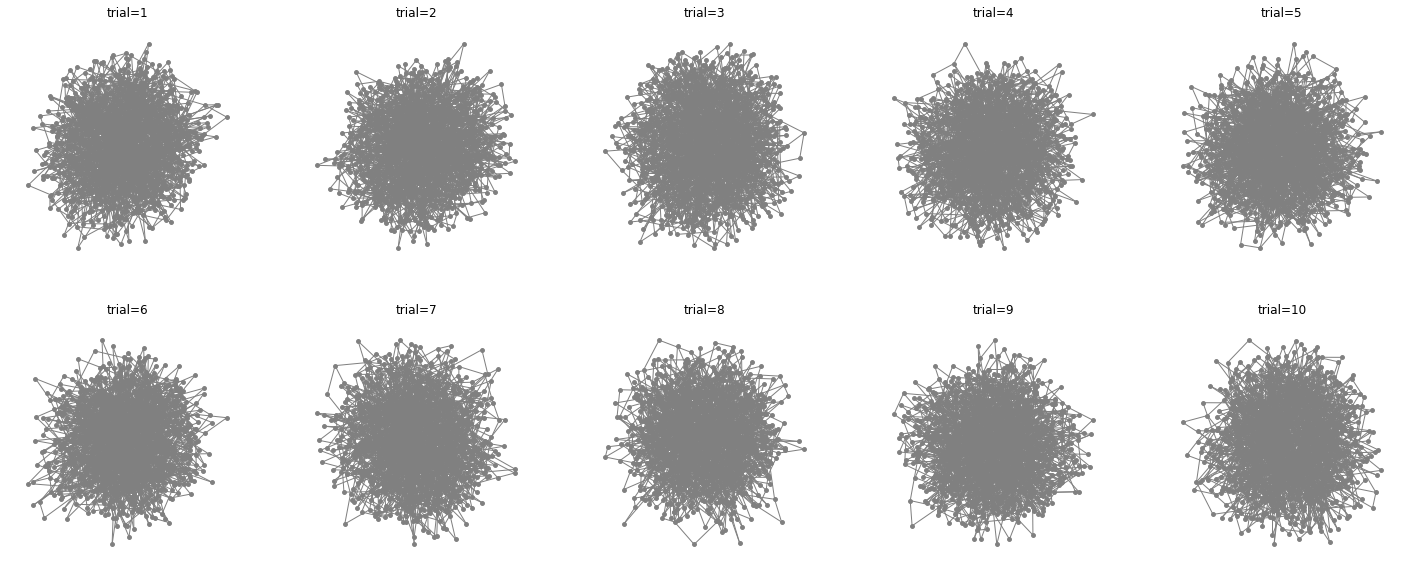

In [6]:
graph_df = load_graph_df('data/20211208_152725_graph.csv')
Gs = {trial: to_graph(graph_df, trial) for trial in set(graph_df.trial)}

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
for x, trial in enumerate(set(graph_df.trial)):
    _ax = ax[int(x / 5), x % 5]
    _ax.set_title('trial={}'.format(trial))
    nx.draw(Gs[trial], node_color='gray', edge_color='gray', node_size=15, ax=_ax)

### Define community

In [11]:
params = list(itertools.product(set(summary_df.hop_learning), set(summary_df.b), set(summary_df.trial)))

In [ ]:
%%time
community_list_list_dict = {param: list(nx.algorithms.community.girvan_newman(Gs[param[2]])) for param in params}
# Wall time: 22min 23s

In [ ]:
# community_list_list_dict[param][community_number] をコミュニティサイズの大きい順にソート
community_number = 20
for param in params:
    community_list_list_dict[param][community_number - 2] = sorted(community_list_list_dict[param][community_number - 2], reverse=True, key=len)
    print('param: {}, community_size_list: {}'.format(param, [len(community) for community in community_list_list_dict[param][community_number - 2]]))

### Load detail data

In [ ]:
detail_df = load_detail_df('data/20211205_200032_detail.csv')
detail_list_dict = {param: detail_df_to_list(detail_df, *param) for param in params}

In [ ]:
def cooperator_rate(cooperators: list, community_set: set) -> float:
    return np.mean([member in cooperators for member in community_set])

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=10, figsize=(35, 25), sharey=True)
plt.subplots_adjust(wspace=0.1)
for x, param in enumerate(params):
    _ax = ax[int(x / 10), x % 10]
    heatmap_data = [[cooperator_rate(detail_list_dict[param][step], community_set) for community_set in community_list_list_dict[param][community_number - 2]] for step in range(101)]
    _ax.set_title('hop_learning={}, b={}, trial={}'.format(*param))
    _ax.pcolor(heatmap_data, cmap=plt.cm.Blues)